## Import Modules

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import cv2
np.random.seed(5)

Using TensorFlow backend.


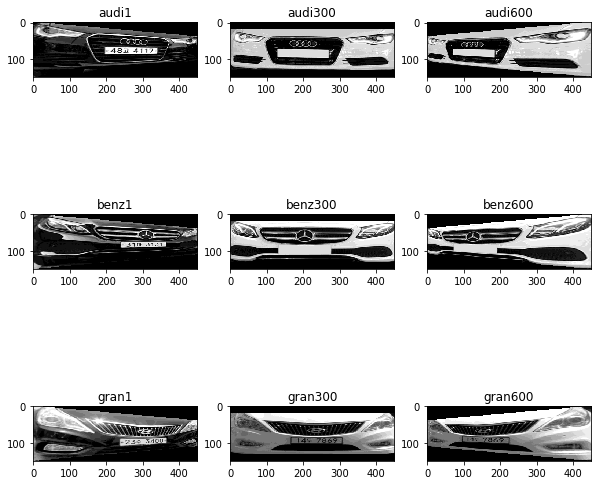

In [4]:
model_name = ['audi', 'benz', 'gran']
num = [1, 300, 600]
i = 1
path = '/content/drive/My Drive/car_image/image_radi_train200_test50_4bit_3class/train200'
plt.figure(figsize = (10,10))
for m in model_name:
  for n in num:
    img = cv2.imread(path + '/{}_train200/{}.png'.format(m, n))
    plt.subplot(3,3,i)
    plt.imshow(img, cmap = plt.cm.gray)
    plt.title('{}{}'.format(m, n))
    i += 1

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/My Drive/car_image/image_radi_train200_test50_4bit_3class/train200',
    target_size = (90,150),
    batch_size = 4,
    class_mode = 'categorical',
    shuffle = True)  

test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/My Drive/car_image/image_radi_train200_test50_4bit_3class/test50',
    target_size = (90,150), # 120, 265 original
    batch_size = 1,
    class_mode = 'categorical')

Found 1809 images belonging to 3 classes.
Found 306 images belonging to 3 classes.


In [6]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (90, 150, 3)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
#opt = SGD(lr=0.01)
#model.compile(loss = "categorical_crossentropy", optimizer = opt, metrics = ['accuracy'])
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

#SVG(model_to_dot(model, show_shapes = True).create(prog = 'dot', format = 'svg'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




## Training data

In [7]:
step = 50
epoch = 10

hist = model.fit_generator(
    train_generator,
    steps_per_epoch = step,
    epochs = epoch,
    validation_data = test_generator)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





50/50 [==============================] - 148s 3s/step - loss: 1.0935 - acc: 0.3750 - val_loss: 1.0507 - val_acc: 0.8301
Epoch 2/10
50/50 [==============================] - 47s 934ms/step - loss: 0.9049 - acc: 0.5400 - val_loss: 0.5004 - val_acc: 0.9020
Epoch 3/10
50/50 [==============================] - 62s 1s/step - loss: 0.3334 - acc: 0.9000 - val_loss: 0.3160 - val_acc: 0.9216
Epoch 4/10
50/50 [==============================] - 56s 1s/step - loss: 0.4624 - acc: 0.8550 - val_loss: 0.6138 - val_acc: 0.8791
Epoch 5/10
50/50 [==============================] - 62s 1s/step - loss: 0.0897 - acc: 0.9850 - val_loss: 0.0079 - val_acc: 1.0000
Epoch 6/10
50/50 [==============================] - 58s 1s/step - loss: 0.0066 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 1.0000
Epoch 7/10
50/50 [==============================] - 63s 1s/step - loss: 0.0045 - acc: 1.0000 - val_loss: 0.0022 - 

## Result of trained model

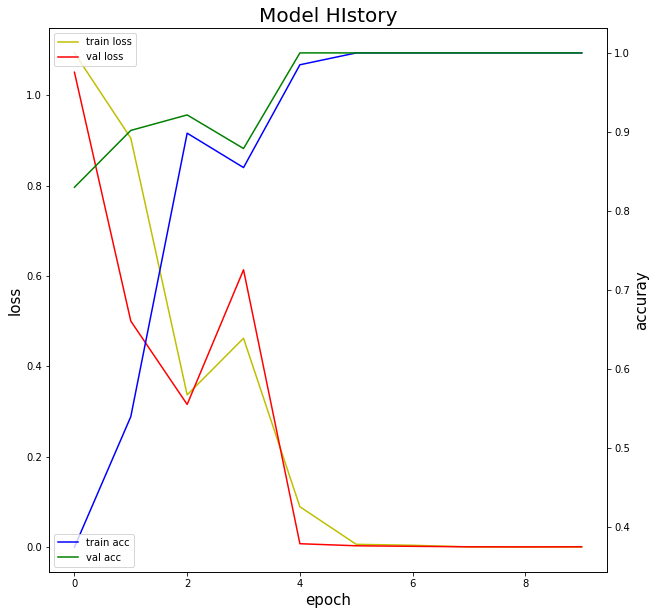

-- Evaluation --
acc : 100.00%


In [8]:
fig, loss_ax = plt.subplots(figsize = (10,10))

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch', fontsize = 15)
loss_ax.set_ylabel('loss', fontsize = 15)
acc_ax.set_ylabel('accuray', fontsize = 15)

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.title('Model HIstory', fontsize = 20)
plt.savefig('Keras.jpg')
plt.show()

print('-- Evaluation --')
scores = model.evaluate_generator(test_generator, steps = 3)
print('%s : %0.2f%%' %(model.metrics_names[1], scores[1]*100))

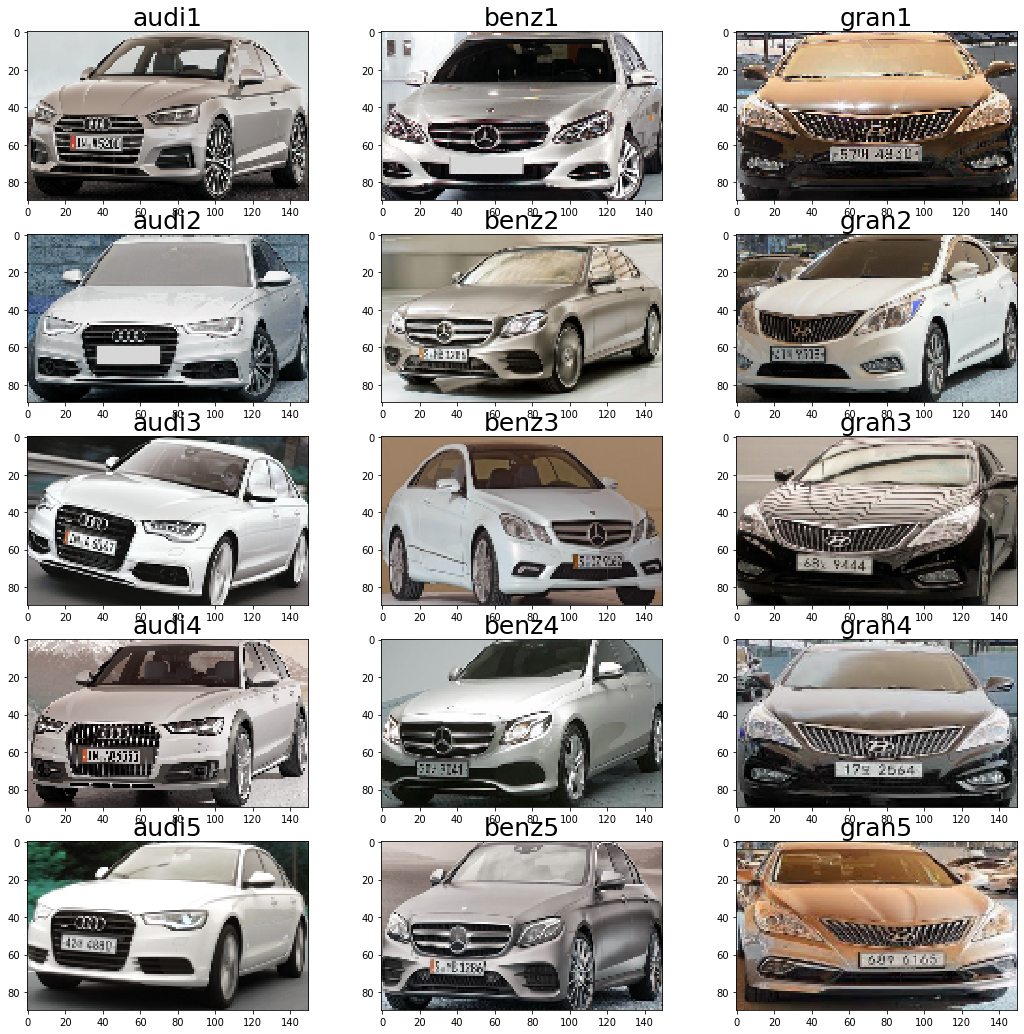

In [9]:
plt.figure(figsize = (18,18))
for m, i in zip(model_name, range(1,4)):
    for n in range(1,6):
        img = cv2.imread('/content/drive/My Drive/car_image/image_prediction_original_4bit/{}/pre_{}.png'.format(m, n))
        img = cv2.resize(img, (150, 90), interpolation=cv2.INTER_LINEAR)
        plt.subplot(5,3,i)
        plt.imshow(img, cmap = plt.cm.gray)
        plt.title('{}{}'.format(m,n), fontsize = 25)
        i += 3

In [10]:
pre_datagen = ImageDataGenerator(rescale=1./255)
pre_generator = pre_datagen.flow_from_directory(
        '/content/drive/My Drive/car_image/image_prediction_radi_4bit',
        target_size=(90, 150),
        class_mode='categorical')

scores = model.evaluate_generator(pre_generator)
print('%s : %0.2f%%' %(model.metrics_names[1], scores[1]*100))
filenames = pre_generator.filenames
nb_samples = len(filenames)
print(filenames)

print('-- prediction --')

output = model.predict_generator(pre_generator) # steps = nb_samples
np.set_printoptions(formatter = {'float': lambda x: '{0:0.3f}'.format(x)})
print(pre_generator.class_indices)
print(output)

import pandas as pd
#output = np.where(output <= 0.0009, 0, output)
df = pd.DataFrame(output, columns = list(pre_generator.class_indices.keys()))

def highlight_max(data, color='yellow'):
    '''
    highlight the maximum in a Series or DataFrame
    '''
    attr = 'background-color: {}'.format(color)
    if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
        is_max = data == data.max()
        return [attr if v else '' for v in is_max]
    else:  # from .apply(axis=None)
        is_max = data == data.max().max()
        return pd.DataFrame(np.where(is_max, attr, ''),
                            index=data.index, columns=data.columns)

df.style.apply(highlight_max, axis = 1)

df = df.reindex(df.idxmax(axis = 1).sort_values().index)
df = df.reset_index(drop = True)
df.style.apply(highlight_max, axis = 1)

Found 15 images belonging to 3 classes.
acc : 73.33%
['audi/pre_1.png', 'audi/pre_2.png', 'audi/pre_3.png', 'audi/pre_4.png', 'audi/pre_5.png', 'benz/pre_1.png', 'benz/pre_2.png', 'benz/pre_3.png', 'benz/pre_4.png', 'benz/pre_5.png', 'gran/pre_1.png', 'gran/pre_2.png', 'gran/pre_3.png', 'gran/pre_4.png', 'gran/pre_5.png']
-- prediction --
{'audi': 0, 'benz': 1, 'gran': 2}
[[0.433 0.548 0.019]
 [0.001 0.998 0.001]
 [0.406 0.568 0.026]
 [0.001 0.939 0.060]
 [0.003 0.161 0.836]
 [0.000 1.000 0.000]
 [0.000 0.005 0.995]
 [0.000 1.000 0.000]
 [0.997 0.003 0.000]
 [0.028 0.960 0.012]
 [0.001 0.194 0.805]
 [0.957 0.040 0.003]
 [0.000 1.000 0.000]
 [0.974 0.015 0.011]
 [0.000 0.999 0.001]]


,audi,benz,gran
0,0.996534,0.00300303,0.000462618
1,0.956507,0.0401985,0.00329463
2,0.97438,0.0147676,0.0108525
3,0.433361,0.548094,0.0185449
4,0.00091657,0.997807,0.00127653
5,0.406358,0.567502,0.0261398
6,0.000971112,0.9388,0.0602288
7,7.55966e-09,1,4.65817e-07
8,1.1125e-08,0.999999,6.9748e-07
9,0.0282971,0.960118,0.0115845


In [11]:
from keras.preprocessing import image
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(90, 150))
    img_tensor = image.img_to_array(img)                   
    img_tensor = np.expand_dims(img_tensor, axis=0)         
    img_tensor /= 255.                                     

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

models_name = ['audi', 'benz', 'gran' ]
models_n = np.arange(1,6)
for models in models_name:
    print(models)
    for model_n in models_n:            
        im_path = '/content/drive/My Drive/car_image/image_prediction_original_4bit/{}/pre_{}.png'.format(models, model_n)
        new_image = load_image(im_path)
        pred = model.predict(new_image)
        print(pred)

    print('\n')

audi
[[0.001 0.063 0.935]]
[[0.595 0.379 0.026]]
[[0.000 0.241 0.759]]
[[0.027 0.412 0.562]]
[[0.048 0.000 0.951]]


benz
[[0.999 0.001 0.001]]
[[0.003 0.532 0.465]]
[[0.070 0.582 0.348]]
[[0.000 0.007 0.993]]
[[0.002 0.029 0.969]]


gran
[[0.273 0.011 0.716]]
[[0.000 0.003 0.997]]
[[0.082 0.137 0.781]]
[[0.879 0.007 0.114]]
[[0.000 0.005 0.994]]




**Save Model**

In [0]:
# Saving the model for Future Inferences

model_json = model.to_json()
with open("car_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("car_model.h5")

In [15]:
from keras.models import model_from_json
#from keras import model_from_json 

# opening and store file in a variable

json_file = open('car_model.json','r')
loaded_model_json = json_file.read()
json_file.close()

# use Keras model_from_json to make a loaded model

loaded_model = model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("car_model.h5")
print("Loaded Model from disk")

# compile and evaluate loaded model

loaded_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Loaded Model from disk
